In [229]:
import pandas as pd
import numpy as np

In [230]:
tweets = pd.read_csv('sarcasm_dataset_cleaned.csv')


In [231]:
tweets['tweet'] = tweets['tweet'].str.replace('@USER', '')

(0.0, 350.0)

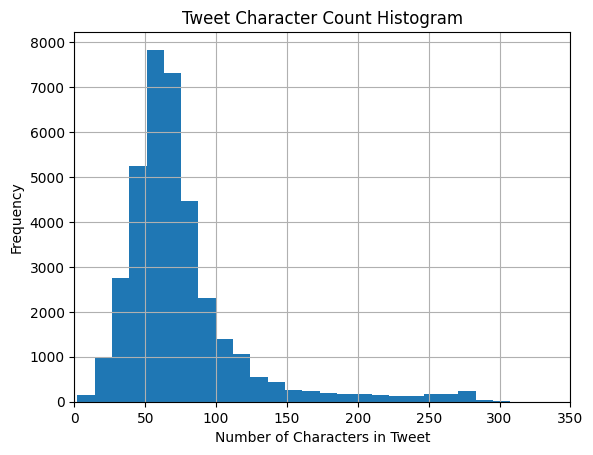

In [232]:
import matplotlib.pyplot as plt

tweets['tweet'].str.len().hist(bins=50)
plt.title('Tweet Character Count Histogram')
plt.xlabel('Number of Characters in Tweet')
plt.ylabel('Frequency')
plt.xlim(0, 350)

(0.0, 80.0)

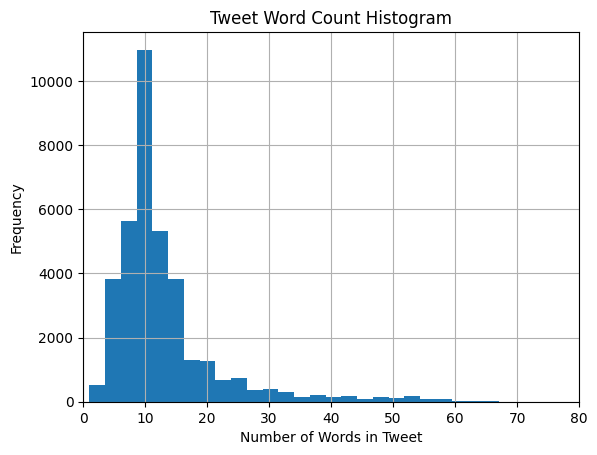

In [233]:
tweets['tweet'].str.split().map(lambda x: len(x)).hist(bins=50)
plt.title('Tweet Word Count Histogram')
plt.ylabel('Frequency')
plt.xlabel('Number of Words in Tweet')
plt.xlim(0,80)

Text(0.5, 0, 'Stop Words')

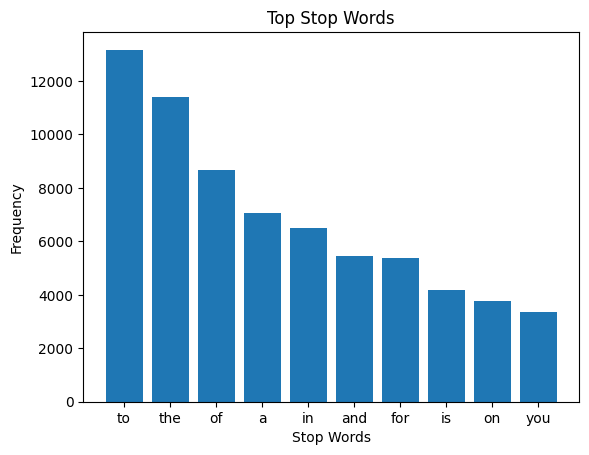

In [234]:
import nltk
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
corpus = []
new = tweets['tweet'].str.split()
new = new.values.tolist()
corpus = [word for tweet_words in new for word in tweet_words]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1], reverse=True)[:10]
x,y=zip(*top)
plt.bar(x,y)
plt.title('Top Stop Words')
plt.ylabel('Frequency')
plt.xlabel('Stop Words')

In [235]:
sarcastic_tweets = tweets.loc[tweets['label']==0]
not_sarcastic_tweets = tweets.loc[tweets['label']==1]

Text(0.5, 1.0, 'Top Words (excluding stop words)')

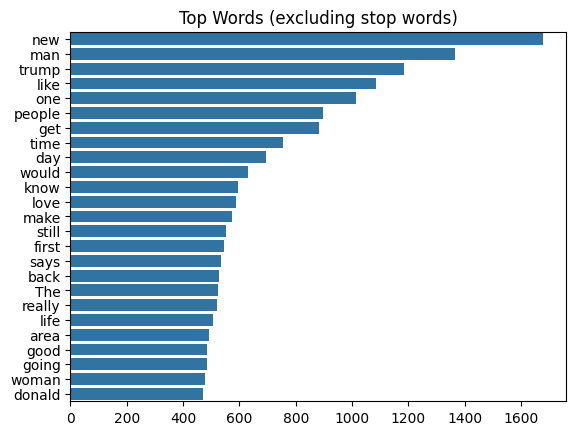

In [236]:
import seaborn as sns
from collections import Counter
counter = Counter(corpus)
most=counter.most_common()
x,y=[],[]
for word, count in most[:100]:
    if word not in stop and word.isalpha() and len(word)>1:
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
plt.title('Top Words (excluding stop words)')

In [237]:
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus1=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)


Text(0.5, 1.0, 'Top quadgrams')

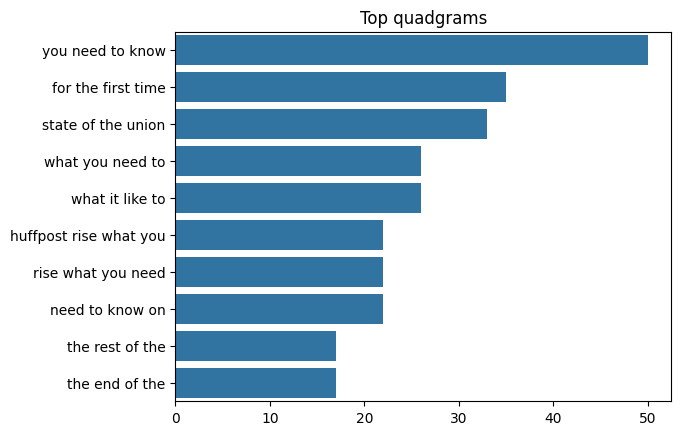

In [238]:
plot_top_ngrams_barchart(tweets['tweet'], 4)
plt.title('Top quadgrams')

Text(0.5, 1.0, 'Top trigrams')

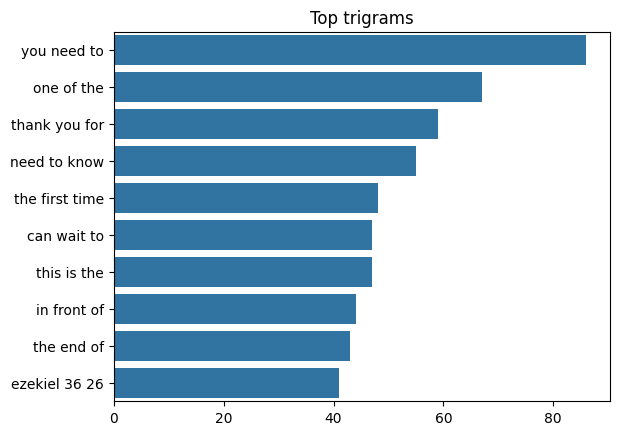

In [239]:
plot_top_ngrams_barchart(tweets['tweet'], 3)
plt.title('Top trigrams')

Text(0.5, 1.0, 'Top Bigrams')

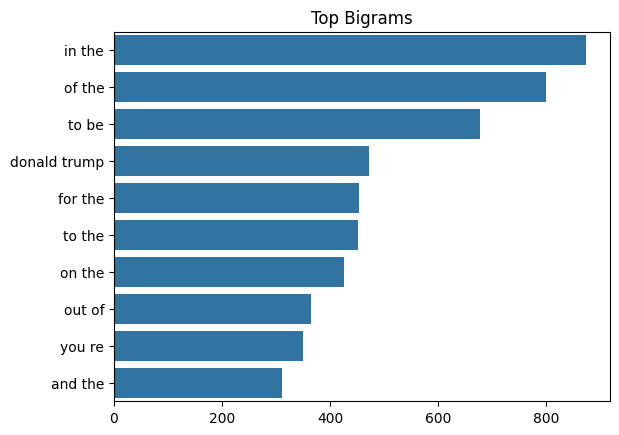

In [240]:
plot_top_ngrams_barchart(tweets['tweet'], 2)
plt.title('Top Bigrams')

In [241]:
# import gensim
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer, PorterStemmer
# from nltk.tokenize import word_tokenize
# import pyLDAvis.gensim

# def get_lda_objects(text):
#     stop = set(stopwords.words('english'))

#     corpus=[]
#     stem=PorterStemmer()
#     lem=WordNetLemmatizer()
#     for tweets in text:
#         words=[w for w in word_tokenize(tweets) if (w not in stop)]
#         words=[lem.lemmatize(w) for w in words if len(w)>2]
#         corpus.append(words)

#     dic=gensim.corpora.Dictionary(corpus)
#     bow_corpus=[dic.doc2bow(doc) for doc in corpus]
#     lda_model = gensim.models.LdaMulticore(bow_corpus,
#                                            num_topics=4,
#                                            id2word=dic,
#                                            passes=10,
#                                            workers=2)

#     return lda_model, bow_corpus, dic

# def plot_lda_vis(lda_model, bow_corpus, dic):
#     pyLDAvis.enable_notebook()
#     vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
#     return vis

In [242]:
# lda_model, bow_corpus, dic = get_lda_objects(tweets['tweet'])

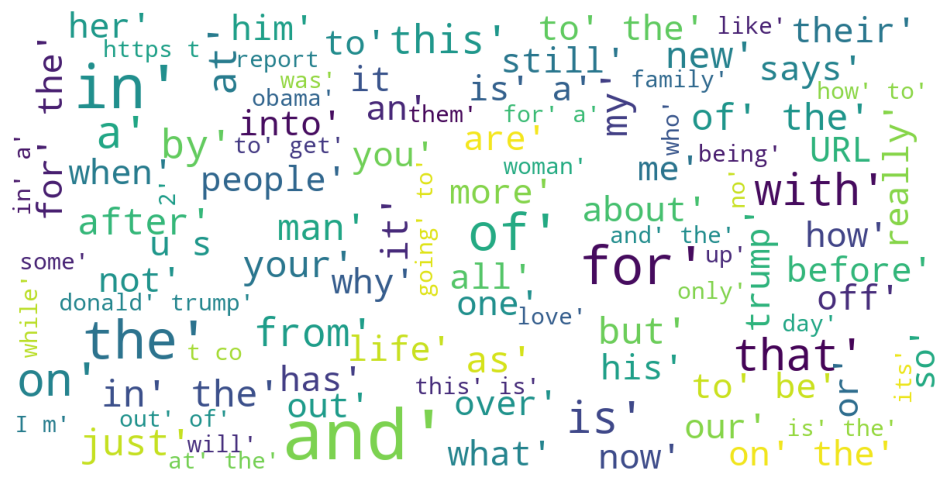

In [249]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import nltk

stopwords = set(STOPWORDS)

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if w not in stop]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=['trump'],
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    )

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1,figsize=(12,12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [247]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Eric\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
